<a href="https://colab.research.google.com/github/ttadesusi/Artificial-Intelligence-Projects/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HEART DISEASE PREDICTION**

---

## **DATA UNDERSTANDING**

The Heart disease dataset contains 303 observations and 14 attributes. This anonymized dataset was retrieved from the University of California (UC) Irvine machine learning repository.

Attributes:
1. age: in years       
2. sex: (1 = male; 0 = female)      
3. cp: chest pain type

      (1: typical angina; 
      2: atypical angina; 
      3: non-anginal pain; 
      4: asymptomatic)

4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)  
5. chol: serum cholestoral in mg/dl      
6. fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)       
7. restecg: restecg: resting electrocardiographic results 

      0: normal, 

      1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 
     
      2: showing probable or definite left ventricular hypertrophy by Estes' criteria   
8. thalach: maximum heart rate achieved   
9. exang: exercise induced angina (1 = yes; 0 = no)     
10. oldpeak: ST depression induced by exercise relative to rest   
11. slope: the slope of the peak exercise ST segment          
      (1: upsloping;
      2: flat;
      3: downsloping) 
12. ca: number of major vessels (0-3) colored by flourosopy        
13. thal: (3 = normal; 6 = fixed defect; 7 = reversable defect)      
14. num: diagnosis of heart disease (angiographic disease status)      
      (0: < 50% diameter narrowing;
      1: > 50% diameter narrowing)    

## **DATA AQUISITION**

In [1]:
# import pandas dataframe and numpy packages
import pandas as pd
import numpy as np

# import visualization package
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read data from web into dataframe
link= 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
df= pd.read_csv(link, names=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num'])

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## **DATA EXPLORATION AND PREPARATION**

In [3]:
# data info
print(df.info(), "\n")  # display attributes (column) data type and number of non-empty cells
print("Number of rows (observations) is", df.shape[0], "and", "Number of columns (attributes) is" , df.shape[1])  # Number of rows and column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB
None 

Number of rows (observations) is 303 and Number of columns (attributes) is 14


In [4]:
# check error values in the data
for col in df.select_dtypes(include=['object','int']).columns:
  print(f"{col}:\n{df[col].value_counts()}\n")

ca:
0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

thal:
3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

num:
0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64



In [5]:
# replace label column values (0,1,2,3,4) to just 0 and 1 (0: no heart disease, 1:heart disease)
df['num'].replace({2:1,3:1,4:1}, inplace=True)

#df.replace("?", np.nan, inplace = True)
print(f"{'num'}:\n{df.num.value_counts()}")

num:
0    164
1    139
Name: num, dtype: int64


In [6]:
# Delete data errors
for col in df.select_dtypes('object').columns:
  df=df[df[col]!='?']
  print(f"{col}:\n{df[col].value_counts()}\n")

# convert attributes with data type-object to float
df = df.astype({'ca':'float','thal':'float'})

df.info()

ca:
0.0    176
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64

thal:
3.0    164
7.0    115
6.0     18
Name: thal, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  num       297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB


## **DATA DESCRIPTIVE STATISTICS**

In [7]:
# summary statistics for numerical values
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,297.0,54.542088,9.049736,29.0,48.0,56.0,61.0,77.0
sex,297.0,0.676768,0.468500,0.0,0.0,1.0,1.0,1.0
cp,297.0,3.158249,0.964859,1.0,3.0,3.0,4.0,4.0
trestbps,297.0,131.693603,17.762806,94.0,120.0,130.0,140.0,200.0
chol,297.0,247.350168,51.997583,126.0,211.0,243.0,276.0,564.0
fbs,297.0,0.144781,0.352474,0.0,0.0,0.0,0.0,1.0
restecg,297.0,0.996633,0.994914,0.0,0.0,1.0,2.0,2.0
thalach,297.0,149.599327,22.941562,71.0,133.0,153.0,166.0,202.0
exang,297.0,0.326599,0.469761,0.0,0.0,0.0,1.0,1.0
oldpeak,297.0,1.055556,1.166123,0.0,0.0,0.8,1.6,6.2


## **DATA DISTRIBUTION**

data skewness:
 sex       -0.759727
cp        -0.844412
fbs        2.029240
restecg    0.006768
exang      0.743256
oldpeak    1.247131
slope      0.510444
ca         1.179548
thal       0.247772
num        0.156138
dtype: float64 

data kurtosis:
 sex       -1.432507
cp        -0.410925
fbs        2.132128
restecg   -1.999674
exang     -1.457431
oldpeak    1.510972
slope     -0.627303
ca         0.235233
thal      -1.915684
num       -1.989061
dtype: float64


<Axes: >

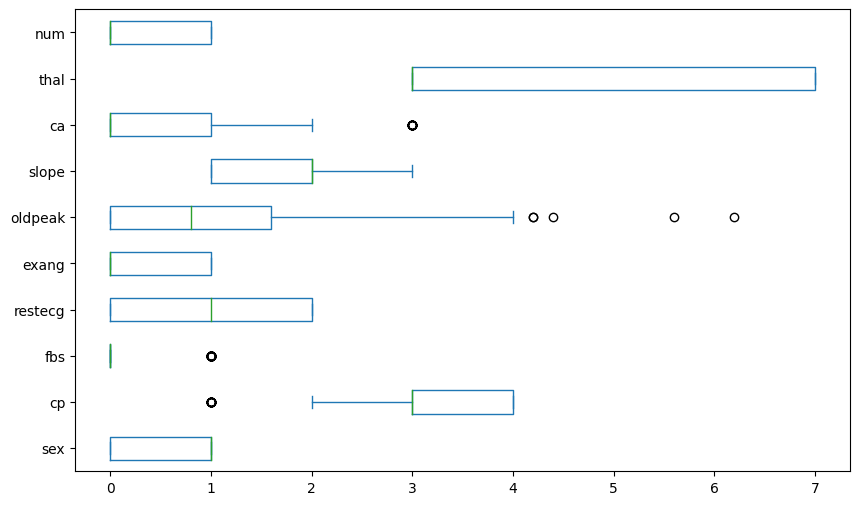

In [8]:
# numeric variables distibution
df1= df.drop(['age','trestbps','chol','thalach'], axis=1)
print('data skewness:\n',df1.skew(),'\n')
print('data kurtosis:\n',df1.kurtosis())
df1.plot.box(figsize=(10,6), vert = False, grid = False)

data skewness:
 sex       -0.759727
cp        -0.844412
fbs        2.029240
restecg    0.006768
exang      0.743256
oldpeak    1.247131
slope      0.510444
ca         1.179548
thal       0.247772
num        0.156138
dtype: float64 

data kurtosis:
 sex       -1.432507
cp        -0.410925
fbs        2.132128
restecg   -1.999674
exang     -1.457431
oldpeak    1.510972
slope     -0.627303
ca         0.235233
thal      -1.915684
num       -1.989061
dtype: float64


<Axes: >

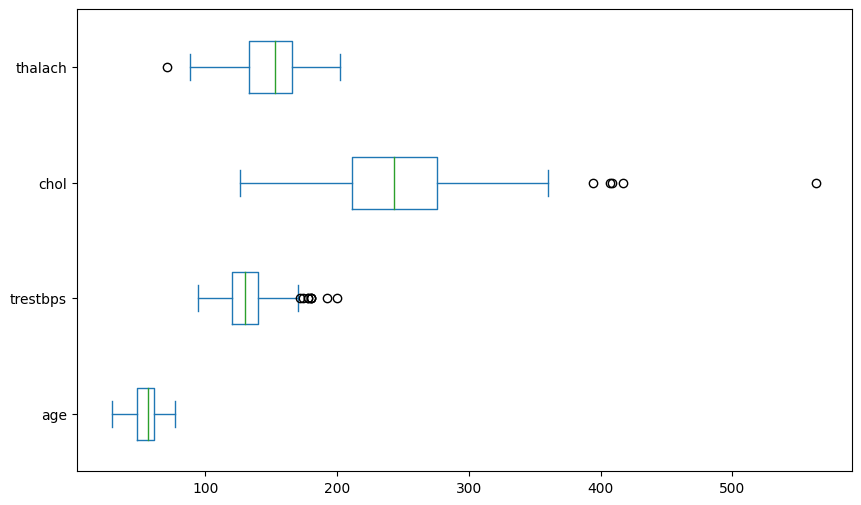

In [9]:
# numeric variables distibution
df2= df[['age','trestbps','chol','thalach']]
print('data skewness:\n',df1.skew(),'\n')
print('data kurtosis:\n',df1.kurtosis())
df2.plot.box(figsize=(10,6), vert = False, grid = False)

## **FEATURES SELECTION AND DATA STANDARDIZATION**

In [10]:
# import split package
from sklearn.model_selection import train_test_split  

### **Features(X) and Target(y) Selection**

In [11]:

X = df.drop(['num'], axis=1)
y = df['num']

### **Data Stardardization**

In [12]:
# import data scaling package
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_X_train=scaler.fit_transform(X)

### **Data Split**

In [13]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(scaled_X_train, y, test_size=0.2, random_state=50)  

print("Number of X train samples:",X_train.shape[0], "and number of X test samples :", X_test.shape[0])
print("Number of y train samples:",y_train.shape[0], "and number of y test samples :", y_test.shape[0])

Number of X train samples: 237 and number of X test samples : 60
Number of y train samples: 237 and number of y test samples : 60


## **MODEL BUILDING AND ACCURACY EVALUATION**

In [14]:
# import hyperparameters tuning package
from sklearn.model_selection import GridSearchCV

# import feature importance package
from sklearn.inspection import permutation_importance

# import model evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score,\
                            mean_squared_error, r2_score

### **LOGISTICS REGRESSION (LR)**

In [15]:
# import logistics regression package 
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=100)

### **Logistics Regression Hyperparameters Tuning With GridSearch**

In [16]:
# define hyparameters for logistic regression
hyperparameters = {'solver': ['liblinear', 'lbfgs'],
                   'C': [0.01, 0.1, 1.0]
                  }
# Create the grid search object 
GS_LR = GridSearchCV(LR, hyperparameters, cv=5, scoring='accuracy')

In [17]:
# fitting the data
GS_LR.fit(X_train, y_train)

# display best hyparameters for logistic regression
best_LR = GS_LR.best_estimator_
print(GS_LR.best_params_, '\n') 

# predicting the test data with the best hyperparameters
y_pred_LR = best_LR.predict(X_test)

print('Predicted y values:   ', y_pred_LR[0:10])
print('Actual y test values: ', y_test[0:10].values)

{'C': 0.01, 'solver': 'liblinear'} 

Predicted y values:    [1 0 1 0 1 0 0 1 1 1]
Actual y test values:  [1 0 1 0 1 0 0 1 1 1]


### **Logistic Regression Model Accuracy Evaluation**

              precision    recall  f1-score   support

           0       0.86      0.91      0.89        34
           1       0.88      0.81      0.84        26

    accuracy                           0.87        60
   macro avg       0.87      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60

f1 score: 0.87


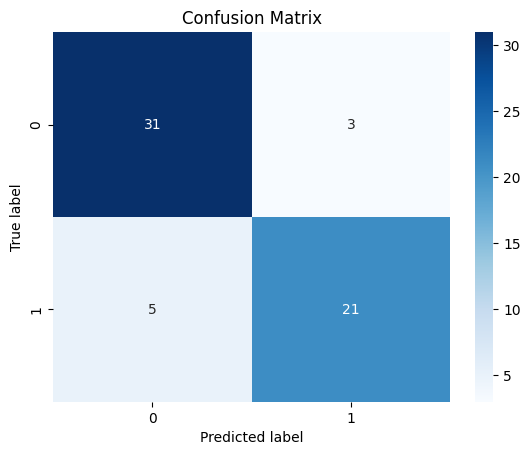

In [18]:
# plot confusion matrix
ax=sns.heatmap(confusion_matrix(y_test, y_pred_LR), annot=True, cmap="Blues")
ax.set(xlabel='Predicted label', ylabel='True label', title="Confusion Matrix")
print(classification_report(y_test, y_pred_LR))

# modelaccuracy score: f1-score and jaccard score
F1_LR = f1_score(y_test, y_pred_LR, average='weighted').round(2)

# print model accuracy scores
print('f1 score:', F1_LR)

### **Importance of Each Feature in the Logistic Regression Model**

thal        0.253324
ca          0.248097
exang       0.200745
cp          0.198585
thalach     0.187237
oldpeak     0.165514
sex         0.136547
slope       0.122798
chol        0.086521
trestbps    0.082539
age         0.072394
restecg     0.068214
fbs         0.023802
dtype: float64


Text(0.5, 1.0, 'Feature Importance')

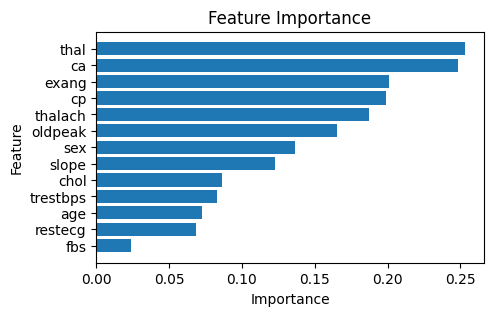

In [19]:
# Map feature importance values to feature names
feature_names = X.columns
feature_importances = pd.Series(abs(best_LR.coef_[0]), index=feature_names)

# Print the feature importance values
print(feature_importances.sort_values(ascending=False))

# Sort feature importance values in descending order
feature_importances = feature_importances.sort_values(ascending=True)

# Plot feature importance barh chart
plt.figure(figsize=(5, 3))
plt.barh(feature_importances.index, feature_importances.values)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

### **RANDOM FOREST (RF)**

In [20]:
# import support random forest classifier package 
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=100)

### **Random Forest Hyperparameters Tuning With GridSearch**

In [21]:
# define hyparameters for random forest classifier
hyperparameters = {'n_estimators': list(range(70,100,10)),
                   'criterion': ['gini','entropy'],
                   'min_samples_leaf': list(range(2,8,2)),
                   'max_depth':list(range(2,8,2))         
                  }
# Create the grid search object 
GS_RF = GridSearchCV(RF, hyperparameters, cv=5, scoring='accuracy')

In [22]:
# fitting the data
GS_RF.fit(X_train, y_train)

# display best hyparameters for random forest classifier
best_RF = GS_RF.best_estimator_
print(best_RF, '\n') 

# predicting the test data with the best hyperparameters
y_pred_RF = best_RF.predict(X_test)

print('Predicted y values:   ', y_pred_RF[0:10])
print('Actual y test values: ', y_test[0:10].values)

RandomForestClassifier(max_depth=4, min_samples_leaf=4, n_estimators=70,
                       random_state=100) 

Predicted y values:    [1 0 1 0 1 0 0 0 1 1]
Actual y test values:  [1 0 1 0 1 0 0 1 1 1]


### **Random Forest Classifier Accuracy Evaluation**

              precision    recall  f1-score   support

           0       0.87      0.97      0.92        34
           1       0.95      0.81      0.88        26

    accuracy                           0.90        60
   macro avg       0.91      0.89      0.90        60
weighted avg       0.91      0.90      0.90        60

f1 score: 0.9


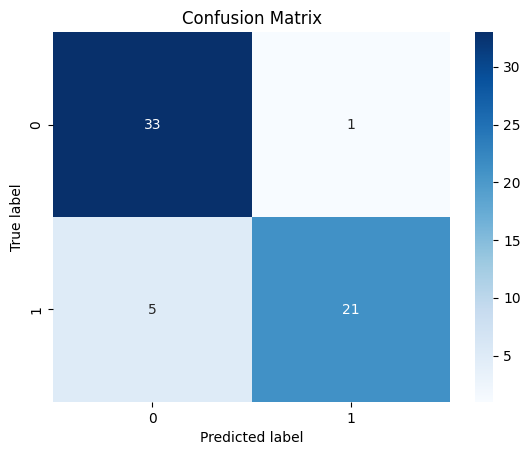

In [23]:
# plot confusion matrix
ax=sns.heatmap(confusion_matrix(y_test, y_pred_RF), annot=True, cmap="Blues")
ax.set(xlabel='Predicted label', ylabel='True label', title="Confusion Matrix")
print(classification_report(y_test, y_pred_RF))

# modelaccuracy score: f1-score and jaccard score
F1_RF = f1_score(y_test, y_pred_RF, average='weighted').round(2)

# print model accuracy scores
print('f1 score:', F1_RF)

### **Importance of Each Feature in the Random Forest Model**

cp          0.177014
thal        0.176584
ca          0.116455
oldpeak     0.114823
thalach     0.105999
exang       0.085835
age         0.060857
slope       0.046531
chol        0.041242
trestbps    0.037221
sex         0.027546
restecg     0.009244
fbs         0.000651
dtype: float64


Text(0.5, 1.0, 'Feature Importance')

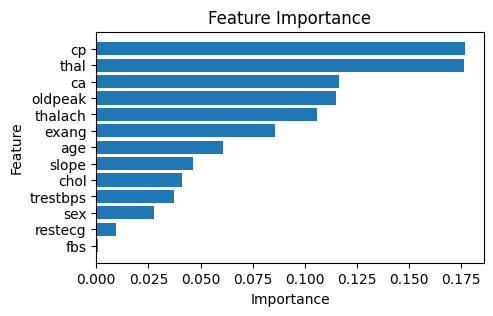

In [24]:
# Map feature importance values to feature names
feature_names = X.columns
feature_importances = pd.Series(abs(best_RF.feature_importances_), index=feature_names)

# Print the feature importance values
print(feature_importances.sort_values(ascending=False))

# Sort feature importance values in descending order
feature_importances = feature_importances.sort_values(ascending=True)

# Plot feature importance barh chart
plt.figure(figsize=(5, 3))
plt.barh(feature_importances.index, feature_importances.values)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

### **XGBOOST (XGB)**

In [25]:
# import XGB classifier package 
from xgboost.sklearn import XGBClassifier
XGB = XGBClassifier(random_state=100)

### **XGBoost Hyperparameters Tuning With GridSearch**

In [26]:
# define hyparameters for XGB classifier
hyperparameters = {'n_estimators': list(range(50,100,10)),
                   'max_depth': list(range(2,10,2)),
                   'learning_rate': [0.01,0.1,1.0],
                   }
# Create the grid search object 
GS_XGB = GridSearchCV(XGB, hyperparameters, cv=5, scoring='accuracy')

In [27]:
GS_XGB.fit(X_train, y_train)

# display best hyparameters for random forest classifier
best_XGB = GS_XGB.best_estimator_
print(GS_XGB.best_params_, '\n') 

# predicting the test data with the best hyperparameters
y_pred_XGB = best_XGB.predict(X_test)

print('Predicted y values:   ', y_pred_XGB[0:10].round())
print('Actual y test values: ', y_test[0:10].values)

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 90} 

Predicted y values:    [1 0 1 0 1 0 0 0 1 1]
Actual y test values:  [1 0 1 0 1 0 0 1 1 1]


### **XGBoost Classifier Accuracy Evaluation**

              precision    recall  f1-score   support

           0       0.83      0.88      0.86        34
           1       0.83      0.77      0.80        26

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60

f1 score: 0.83


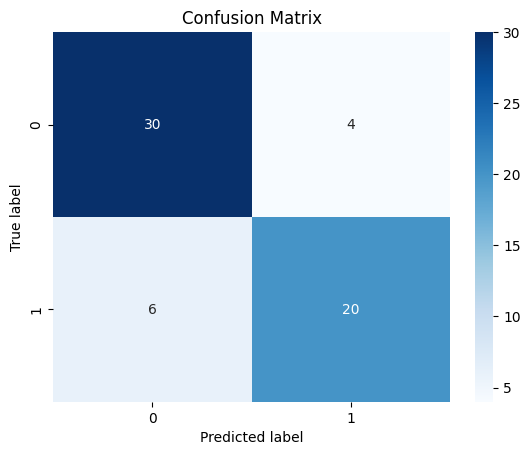

In [28]:
# plot confusion matrix
ax=sns.heatmap(confusion_matrix(y_test, y_pred_XGB), annot=True, cmap="Blues")
ax.set(xlabel='Predicted label', ylabel='True label', title="Confusion Matrix")
print(classification_report(y_test, y_pred_XGB))

# modelaccuracy score: f1-score
F1_XGB = f1_score(y_test, y_pred_XGB, average='weighted').round(2)

# print model accuracy scores
print('f1 score:', F1_XGB)

### **Features Importance in the XGBoost Model**

cp          0.300006
thal        0.190390
ca          0.094288
exang       0.070812
thalach     0.056447
oldpeak     0.047990
chol        0.044945
sex         0.044004
slope       0.042893
age         0.039991
trestbps    0.037507
restecg     0.030727
fbs         0.000000
dtype: float32


Text(0.5, 1.0, 'Feature Importance')

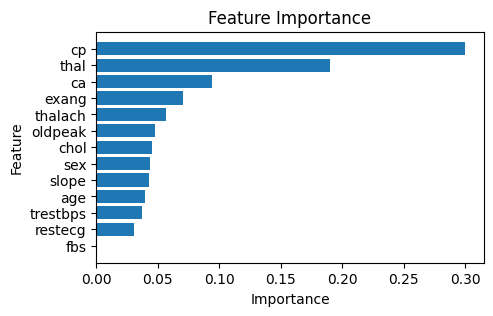

In [29]:
# Map feature importance values to feature names
feature_names = X.columns
feature_importances = pd.Series(abs(best_XGB.feature_importances_), index=feature_names)

# Print the feature importance values
print(feature_importances.sort_values(ascending=False))

# Sort feature importance values in descending order
feature_importances = feature_importances.sort_values(ascending=True)

# Plot feature importance barh chart
plt.figure(figsize=(5, 3))
plt.barh(feature_importances.index, feature_importances.values)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

### **SUPPORT VECTOR MACHINE (SVM)**

In [30]:
# import support vector machine package 
from sklearn import svm
SVM = svm.SVC(random_state=100)

### **SVM Hyperparameters Tuning With GridSearch**

In [31]:
# define hyparameters for SVM
hyperparameters = {'kernel': ['linear'],
                  'C': [0.01, 0.1, 1.0],
                  'gamma': [0.01,0.1,1.0]
                  }
# Create the grid search object 
GS_SVM = GridSearchCV(SVM, hyperparameters, cv=5, scoring='accuracy')

In [32]:
# fitting the data
GS_SVM.fit(X_train, y_train)

# display best hyparameters for support vector machine
best_SVM = GS_SVM.best_estimator_
print(GS_SVM.best_params_, '\n') 

# predicting the test data with the best hyperparameters
y_pred_SVM = best_SVM.predict(X_test)

print('Predicted y values:   ', y_pred_SVM[0:10])
print('Actual y test values: ', y_test[0:10].values)

{'C': 0.01, 'gamma': 0.01, 'kernel': 'linear'} 

Predicted y values:    [1 0 1 0 1 0 0 1 1 1]
Actual y test values:  [1 0 1 0 1 0 0 1 1 1]


### **SVM Model Accuracy Evaluation**

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        34
           1       0.92      0.85      0.88        26

    accuracy                           0.90        60
   macro avg       0.90      0.89      0.90        60
weighted avg       0.90      0.90      0.90        60

f1 score: 0.9


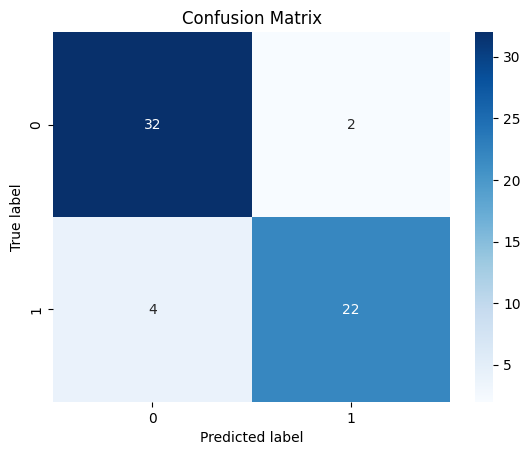

In [33]:
# plot confusion matrix
ax=sns.heatmap(confusion_matrix(y_test, y_pred_SVM), annot=True, cmap="Blues")
ax.set(xlabel='Predicted label', ylabel='True label', title="Confusion Matrix")
print(classification_report(y_test, y_pred_SVM))

# modelaccuracy score: f1-score
F1_SVM = f1_score(y_test, y_pred_SVM, average='weighted').round(2)

# print model accuracy scores
print('f1 score:', F1_SVM)

### **Importance of Each Feature in the Support Vector Machine Model**

thal        0.335386
ca          0.280004
cp          0.255562
exang       0.244002
thalach     0.176539
oldpeak     0.141049
sex         0.118502
slope       0.097375
chol        0.090480
trestbps    0.064133
fbs         0.053011
restecg     0.040756
age         0.021463
dtype: float64


Text(0.5, 1.0, 'Feature Importance')

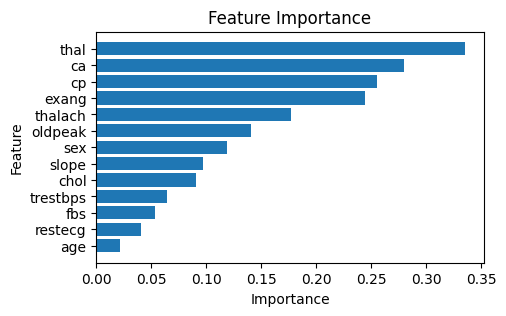

In [34]:
# Map feature importance values to feature names
feature_names = X.columns
feature_importances = pd.Series(abs(best_SVM.coef_[0]), index=feature_names)

# Print the feature importance values
print(feature_importances.sort_values(ascending=False))

# Sort feature importance values in descending order
feature_importances = feature_importances.sort_values(ascending=True)

# Plot feature importance barh chart
plt.figure(figsize=(5, 3))
plt.barh(feature_importances.index, feature_importances.values)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

### **GAUSSIAN NAIVE BAYES (GNB)**

In [35]:
# import multinomial naive bayes package 
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()

### **NB Hyperparameters Tuning With GridSearch**

In [36]:
# define hyparameters for NB
hyperparameters = {}

# Create the grid search object 
GS_GNB = GridSearchCV(GNB, hyperparameters, cv=5, scoring='accuracy')

In [37]:
# fitting the data
GS_GNB.fit(X_train, y_train)

# display best hyparameters for NB
best_GNB = GS_GNB.best_estimator_
print(best_GNB, '\n') 

# predicting the test data with the best hyperparameters
y_pred_GNB = best_GNB.predict(X_test)

print('Predicted y values:   ', y_pred_GNB[0:10])
print('Actual y test values: ', y_test[0:10].values)

GaussianNB() 

Predicted y values:    [1 0 1 0 1 0 0 1 1 1]
Actual y test values:  [1 0 1 0 1 0 0 1 1 1]


              precision    recall  f1-score   support

           0       0.88      0.85      0.87        34
           1       0.81      0.85      0.83        26

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60

f1 score: 0.85


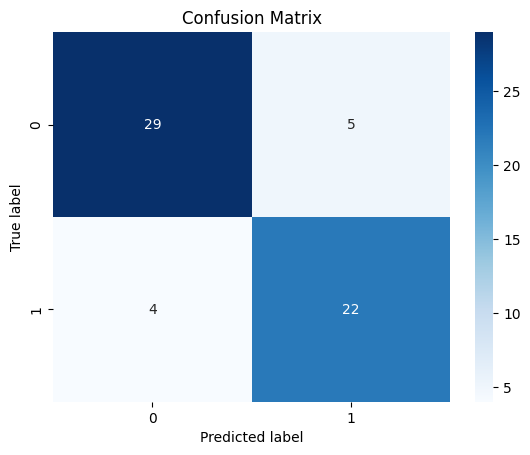

In [38]:
# plot confusion matrix
ax=sns.heatmap(confusion_matrix(y_test, y_pred_GNB), annot=True, cmap="Blues")
ax.set(xlabel='Predicted label', ylabel='True label', title="Confusion Matrix")
print(classification_report(y_test, y_pred_GNB))

# modelaccuracy score: f1-score
F1_GNB = f1_score(y_test, y_pred_GNB, average='weighted').round(2)

# print model accuracy scores
print('f1 score:', F1_GNB)

### **Importance of Each Feature in the Gaussian Naive Bayes Model**

Text(0.5, 1.0, 'Feature Importance')

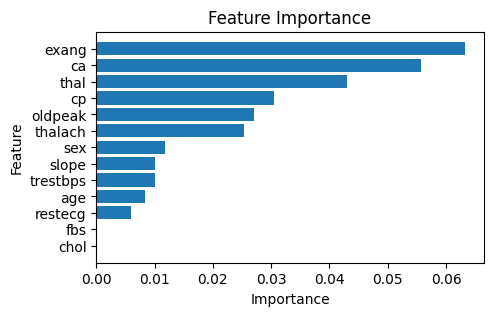

In [39]:
# Calculate feature importance using permutation importance
result = permutation_importance(best_GNB, X_train, y_train)

# Map feature importance values to feature names
feature_names = X.columns
feature_importances = pd.Series(abs(result.importances_mean.round(4)), index=feature_names)

# Print the feature importance values
feature_importances = feature_importances.sort_values(ascending=True)

# Sort feature importance values in descending order
feature_importances = feature_importances.sort_values(ascending=True)

# Plot feature importance bar chart
plt.figure(figsize=(5, 3))
plt.barh(feature_importances.index, feature_importances.values)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

### **ARTIFICAL NEURAL NETWORK(ANN)**

In [40]:
# install sckikeras library
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
# import ANN algorithm package
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier

In [42]:
# Define the architecture of an ANN model
def create_model(hidden_layers=1, neurons=12):
  model = Sequential()
  model.add(Dense(neurons, input_dim=X_train.shape[1], activation='relu'))
  for i in range(hidden_layers):
    model.add(Dense(neurons, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

# Create the Keras classifier for use in grid search
ANN = KerasClassifier(model=create_model,
                      hidden_layers='hidden_layers', 
                      neurons='neurons',
                      verbose=0
                      )

### **ANN Hyperparameters Tuning With GridSearch**

In [43]:
# Define the grid search parameters
hyperparameters = {'batch_size': list(range(24,32,4)),
                   'epochs': list(range(50,100,20)),
                   'hidden_layers': list(range(2,4,2)),
                   'neurons': list(range(8,24,4))
                   }
# Create the grid search object                  
GS_ANN = GridSearchCV(ANN, hyperparameters, scoring='accuracy', cv=5, n_jobs=-1)

In [44]:
# fitting the data
GS_ANN.fit(X_train, y_train)

# print the best hyperparameters
print(GS_ANN.best_params_) 
best_ANN = GS_ANN.best_estimator_ 

# predicting the test data with the best hyperparameters
y_pred_ANN = best_ANN.predict(X_test)

print('Predicted y values:   ', y_pred_ANN[0:10].round(2))
print('Actual y test values: ', y_test[0:10].values)

{'batch_size': 24, 'epochs': 50, 'hidden_layers': 2, 'neurons': 12}
Predicted y values:    [1 0 1 0 1 0 0 1 1 1]
Actual y test values:  [1 0 1 0 1 0 0 1 1 1]


### **ANN Model Accuracy Evaluation**

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        34
           1       0.88      0.85      0.86        26

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60

f1 score: 0.88


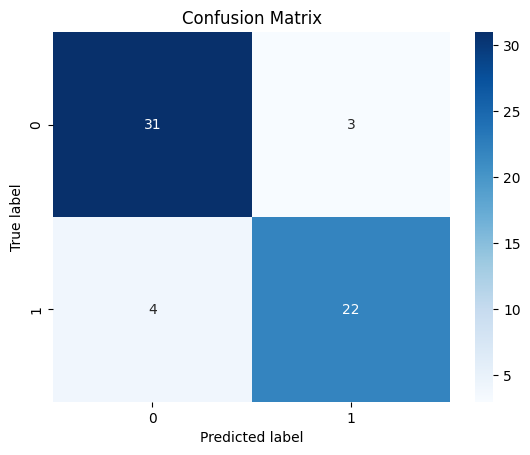

In [45]:
# plot confusion matrix
ax=sns.heatmap(confusion_matrix(y_test, y_pred_ANN), annot=True, cmap="Blues")
ax.set(xlabel='Predicted label', ylabel='True label', title="Confusion Matrix")
print(classification_report(y_test, y_pred_ANN))

# modelaccuracy score: f1-score and jaccard score
F1_ANN = f1_score(y_test, y_pred_ANN, average='weighted').round(2)

# print model accuracy scores
print('f1 score:', F1_ANN)


### **Importance of Each Feature in the Artificial Neural Network Model**

Text(0.5, 1.0, 'Feature Importance')

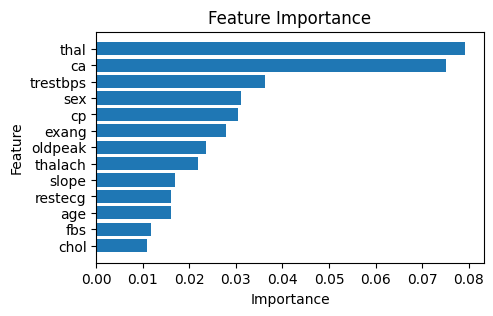

In [46]:
# Calculate feature importance using permutation importance
result = permutation_importance(best_ANN, X_train, y_train)

# Map feature importance values to feature names
feature_names = X.columns
feature_importances = pd.Series(abs(result.importances_mean.round(4)), index=feature_names)

# Print the feature importance values
feature_importances = feature_importances.sort_values(ascending=True)

# Sort feature importance values in descending order
feature_importances = feature_importances.sort_values(ascending=True)

# Plot feature importance bar chart
plt.figure(figsize=(5, 3))
plt.barh(feature_importances.index, feature_importances.values)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

## **MODELS ACCURACY REPORT**

In [47]:
# Models accuracy report

metrics = [['Logistic Regression', F1_LR], 
           ['Support Vector Machine', F1_SVM], 
           ['Gaussian Naive Bayes', F1_GNB],
           ['Random Forest', F1_RF],
           ['Artificial Neural Network', F1_ANN]]

metrics_df = pd.DataFrame(metrics, columns = ['Algorithm','F1-score']).round(2)
metrics_df.set_index('Algorithm', inplace =  True)
metrics_df.sort_values('F1-score', ascending=False, inplace=True)

metrics_df

,F1-score
Algorithm,
Support Vector Machine,0.90
Random Forest,0.90
Artificial Neural Network,0.88
Logistic Regression,0.87
Gaussian Naive Bayes,0.85
